In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [37]:
# Colors

colors = {
    "Baseline": (26/255, 29/255, 26/255, 1),
    "Kong": (25/255, 145/255, 89/255, 1),
    "Kong_no-auth": (63/255, 222/255, 148/255, 1),
    "Istio": (65/255, 85/255, 153/255, 1)
}

In [38]:
# Function to format the labels
def thousands_separator(x, pos):
    return '{:,.0f}'.format(x)  # This adds a comma as a thousand separator

In [39]:
# User Levels

user_levels = np.array([1, 5, 10, 50, 100])

In [40]:
# jtl exploration
# read and write response times
import csv, json, os

RESPONSE_TIMES_FILE = "compiled_response_times.json"


if os.path.isfile(RESPONSE_TIMES_FILE) != True:
    response_times = {
    'Baseline': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong': { 
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong_no-auth': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Istio':{
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    }
}
    
    # gather response times and put them into dict
    for method in ['vanilla', 'kong', 'kong_no-auth', 'istio']:
        for users in user_levels:
            with open(f'{method}/result_{str(users)}_users.jtl', newline='') as csvfile:
                reader = csv.DictReader(csvfile, delimiter=',')
                line = 0
                for row in reader:
                    
                    if method == 'vanilla':
                        index = 'Baseline'
                    elif method == 'kong':
                        index = 'Kong'
                    elif method == 'kong_no-auth':
                        index = 'Kong_no-auth'
                    elif method == 'istio':
                        index = 'Istio'
                    else:
                        print("ERROR")
                        break

                    response_times[index][str(users)].append(float(row['elapsed']))
                    line += 1

    # write dict to json
    with open(RESPONSE_TIMES_FILE, "w") as file:
        json.dump(response_times, file)

else:
    with open(RESPONSE_TIMES_FILE, 'r') as file:
        response_times = json.load(file)

In [41]:
# get statistics and write to json
STATISTICS_FILE = "statistics.json"

response_times = {}

# read response time json
with open(RESPONSE_TIMES_FILE) as file:
    response_times = json.load(file)
    

statistics = {
    'Baseline': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong_no-auth': {
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Istio':{
        '1': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'avg': 0.0,
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    }
}


if os.path.isfile(STATISTICS_FILE) != True:

    for method in statistics:
        for users in statistics[method]:
            numeric_data = np.array(response_times[method][users], dtype=float)
            statistics[method][users]['avg'] = np.mean(numeric_data)
            statistics[method][users]['min'] = np.min(numeric_data)
            statistics[method][users]['max'] = np.max(numeric_data)
            statistics[method][users]['25'] = np.percentile(numeric_data, 25)
            statistics[method][users]['50'] = np.percentile(numeric_data, 50)
            statistics[method][users]['75'] = np.percentile(numeric_data, 75)

    with open(STATISTICS_FILE, 'w') as file:
        json.dump(statistics, file, indent=2)
else:
    with open(STATISTICS_FILE, 'r') as file:
        statistics = json.load(file)

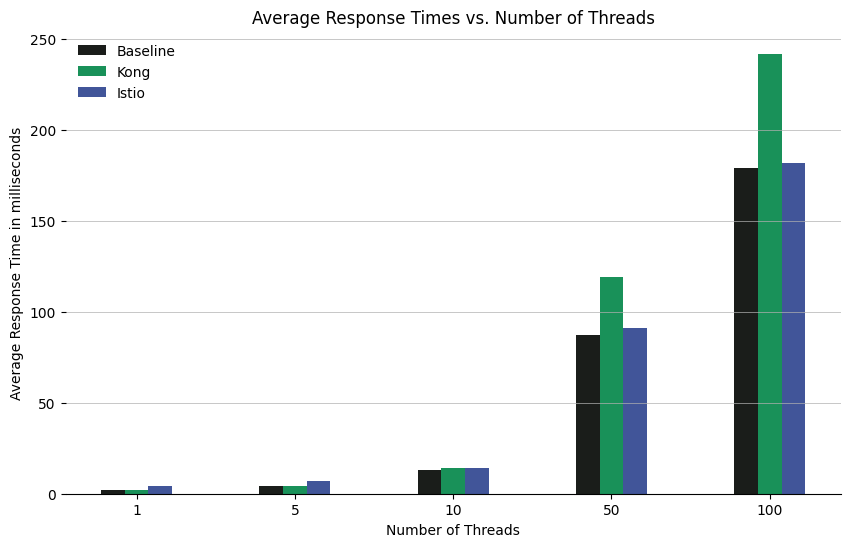

In [42]:
## AVERAGE RESPONSE TIMES ##

# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 0.5 * width, [times['avg'] for times in statistics['Baseline'].values()], width, label='Baseline', align='center', color=colors['Baseline'])
plt.bar(x + 0.5 * width, [times['avg'] for times in statistics['Kong'].values()], width, label='Kong', align='center', color=colors['Kong'])
#plt.bar(x + 1.0 * width, [times['avg'] for times in statistics['Kong_no-auth'].values()], width, label='Kong no auth', align='center', color=colors['Kong_no-auth'])
plt.bar(x + 1.5 * width, [times['avg'] for times in statistics['Istio'].values()], width, label='Istio', align='center', color=colors['Istio'])

# Adding titles and labels
plt.title('Average Response Times vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Average Response Time in milliseconds')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend(frameon=False)

ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Display and save the plot
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Average_response_times.png')
plt.show()

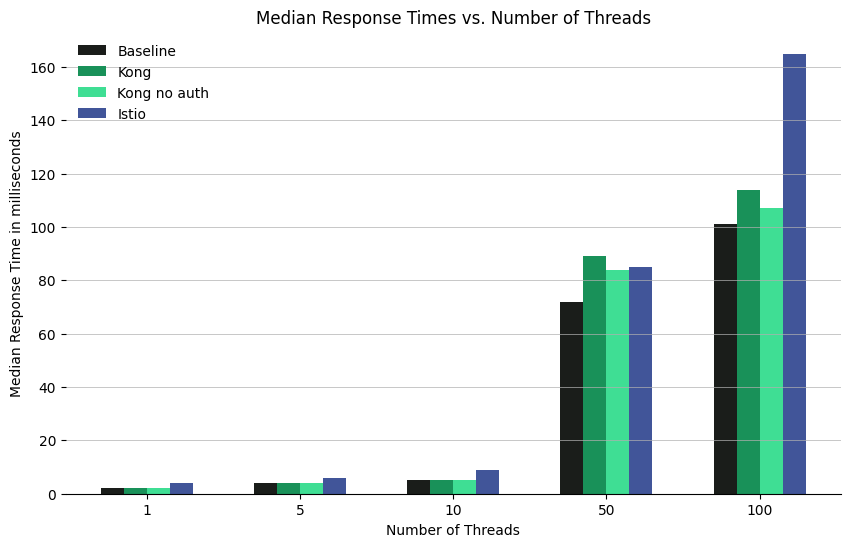

In [43]:
## MEDIAN RESPONSE TIMES ##

# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 1.0 * width, [times['50'] for times in statistics['Baseline'].values()], width, label='Baseline', align='center', color=colors['Baseline'])
plt.bar(x + 0.0 * width, [times['50'] for times in statistics['Kong'].values()], width, label='Kong', align='center', color=colors['Kong'])
plt.bar(x + 1.0 * width, [times['50'] for times in statistics['Kong_no-auth'].values()], width, label='Kong no auth', align='center', color=colors['Kong_no-auth'])
plt.bar(x + 2.0 * width, [times['50'] for times in statistics['Istio'].values()], width, label='Istio', align='center', color=colors['Istio'])

# Adding titles and labels
plt.title('Median Response Times vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Median Response Time in milliseconds')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend(frameon=False)

ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Display and save the plot
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Median_response_times.png')
plt.show()

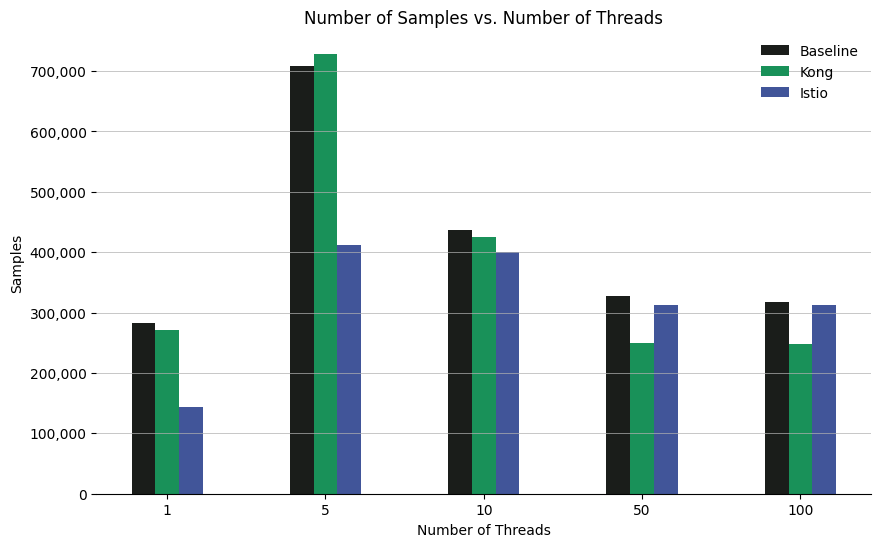

[282124, 708455, 437570, 327614, 318355]
[271061, 728829, 424729, 250184, 247256]
[276232, 715741, 443054, 332145, 326089]
[143758, 411640, 400109, 312932, 313177]


In [44]:
## NUMBER OF SAMPLES ##

# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 0.5 * width, [len(samples) for samples in response_times['Baseline'].values()], width, label='Baseline', align='center', color=colors['Baseline'])
plt.bar(x + 0.5 * width, [len(samples) for samples in response_times['Kong'].values()], width, label='Kong', align='center', color=colors['Kong'])
#plt.bar(x + 1.0 * width, [len(samples) for samples in response_times['Kong_no-auth'].values()], width, label='Kong no auth', align='center', color=colors['Kong_no-auth'])
plt.bar(x + 1.5 * width, [len(samples) for samples in response_times['Istio'].values()], width, label='Istio', align='center', color=colors['Istio'])

# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.title('Number of Samples vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Samples')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend(frameon=False)

ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Display the plot
#plt.grid(True)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Samples.png')
plt.show()


print([len(samples) for samples in response_times['Baseline'].values()])
print([len(samples) for samples in response_times['Kong'].values()])
print([len(samples) for samples in response_times['Kong_no-auth'].values()])
print([len(samples) for samples in response_times['Istio'].values()])
